# EDA on Pakistan Population Data

**Auther** : M Arham Rafique

**Date**    : 20-11-2021

**Email** : arham7813@gamil.com

# About Dataset

The Data is Collected from the followig [link](https://www.kaggle.com/datasets/mabdullahsajid/population-of-pakistan-dataset)

## Description
This dataset contains demographic information from the Pakistan Population Census conducted in 2017. It provides detailed population data at various administrative levels within Pakistan, including provinces, divisions, districts, and sub-divisions. The dataset also includes information on urban and rural populations, gender distribution, transgender individuals, sex ratios, population figures from the 1998 census, and annual growth rates.
 
## Features

**Province**: The administrative provinces or regions of Pakistan where the census data was collected.

**Division**: The divisions within each province. Divisions are the second level of administrative divisions in Pakistan.

**District**: Districts within each division, representing larger administrative units.

**Sub-Division**: Sub-divisions or tehsils within each district, providing more localized data.

**Area**: The land area (in square kilometers) of each sub-division.

**Urban Population 2017**: The population of urban areas within each sub-division for the year 2017.

**Rural Population 2017**: The population of rural areas within each sub-division for the year 2017.

**Male Population 2017**: The male population within each sub-division for the year 2017.

**Female Population 2017**: The female population within each sub-division for the year 2017.

**Transgender Population 2017**: The population of transgender individuals within each sub-division for the year 2017.

**Sex Ratio 2017**: The sex ratio, calculated as the number of females per 1000 males, within each sub-division for the year 2017.

**Population in 1998**: The total population of each sub-division as recorded in the 1998 census.

**Annual Growth Rate**: The annual growth rate of the population in each sub-division, calculated as the percentage increase from 1998 to 2017.



In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. COMPOSTION

In [71]:
df = pd.read_csv('data.csv')
df.head()

PROVINCE             DIVISION               DISTRICT         SUB DIVISION  \
0   PUNJAB  BAHAWALPUR DIVISION  BAHAWALNAGAR DISTRICT  BAHAWALNAGAR TEHSIL   
1   PUNJAB  BAHAWALPUR DIVISION  BAHAWALNAGAR DISTRICT     CHISHTIAN TEHSIL   
2   PUNJAB  BAHAWALPUR DIVISION  BAHAWALNAGAR DISTRICT    FORT ABBAS TEHSIL   
3   PUNJAB  BAHAWALPUR DIVISION  BAHAWALNAGAR DISTRICT    HAROONABAD TEHSIL   
4   PUNJAB  BAHAWALPUR DIVISION  BAHAWALNAGAR DISTRICT   MINCHINABAD TEHSIL   

   AREA (sq.km)  ALL SEXES (RURAL)  MALE (RURAL)  FEMALE (RURAL)  \
0        1729.0             619550        316864          302644   
1        1500.0             540342        273788          266500   
2        2536.0             361240        182655          178541   
3        1295.0             382115        192278          189808   
4        1818.0             452723        231506          221178   

   TRANSGENDER (RURAL)  SEX RATIO (RURAL)  AVG HOUSEHOLD SIZE (RURAL)  \
0                   42             104.70                        6.10   
1                   54             102.73                        6.15   
2                   44             102.30                        6.32   
3                   29             101.30                        6.15   
4                   39             104.67                        6.29   

   POPULATION 1998 (RURAL)  ANNUAL GROWTH RATE (RURAL)  ALL SEXES (URBAN)  \
0                   407768                        2.22             193840   
1                   395983                        1.65             149424   
2                   250959                        1.93              61528   
3                   297343                        1.33             142600   
4                   316593                        1.90              72294   

   MALE (URBAN)  FEMALE (URBAN)  TRANSGENDER (URBAN)  SEX RATIO (URBAN)  \
0         98391           95402                   47             103.13   
1         75546           73851                   27             102.30   
2         31360           30150                   18             104.01   
3         71345           71236                   19             100.15   
4         36694           35590                   10             103.10   

   AVG HOUSEHOLD SIZE (URBAN)  POPULATION 1998 (URBAN)  \
0                        6.02                   133785   
1                        6.01                   102287   
2                        6.00                    34637   
3                        6.02                    84424   
4                        6.34                    37668   

   ANNUAL GROWTH RATE (URBAN)  
0                        1.97  
1                        2.01  
2                        3.06  
3                        2.79  
4                        3.48

In [72]:
#printing the all columns 

pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [73]:
df.columns

Index(['PROVINCE', 'DIVISION', 'DISTRICT', 'SUB DIVISION', 'AREA (sq.km)',
       'ALL SEXES (RURAL)', 'MALE (RURAL)', 'FEMALE (RURAL)',
       'TRANSGENDER (RURAL)', 'SEX RATIO (RURAL)',
       'AVG HOUSEHOLD SIZE (RURAL)', 'POPULATION 1998 (RURAL)',
       'ANNUAL GROWTH RATE (RURAL)', 'ALL SEXES (URBAN)', 'MALE (URBAN)',
       'FEMALE (URBAN)', 'TRANSGENDER (URBAN)', 'SEX RATIO (URBAN)',
       'AVG HOUSEHOLD SIZE (URBAN)', 'POPULATION 1998 (URBAN)',
       'ANNUAL GROWTH RATE (URBAN)'],
      dtype='object')

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 528 entries, 0 to 527
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   PROVINCE                    528 non-null    object 
 1   DIVISION                    528 non-null    object 
 2   DISTRICT                    528 non-null    object 
 3   SUB DIVISION                528 non-null    object 
 4   AREA (sq.km)                528 non-null    float64
 5   ALL SEXES (RURAL)           528 non-null    int64  
 6   MALE (RURAL)                528 non-null    int64  
 7   FEMALE (RURAL)              528 non-null    int64  
 8   TRANSGENDER (RURAL)         528 non-null    int64  
 9   SEX RATIO (RURAL)           528 non-null    float64
 10  AVG HOUSEHOLD SIZE (RURAL)  528 non-null    float64
 11  POPULATION 1998 (RURAL)     528 non-null    int64  
 12  ANNUAL GROWTH RATE (RURAL)  528 non-null    float64
 13  ALL SEXES (URBAN)           528 non

In [75]:
df.describe().T

count           mean            std  min  \
AREA (sq.km)                528.0    1492.005871    2039.453778  0.0   
ALL SEXES (RURAL)           528.0  246278.011364  271189.816559  0.0   
MALE (RURAL)                528.0  125275.687500  137563.021458  0.0   
FEMALE (RURAL)              528.0  120984.149621  133716.898296  0.0   
TRANSGENDER (RURAL)         528.0      18.174242      25.522248  0.0   
SEX RATIO (RURAL)           528.0      98.982614      26.812660  0.0   
AVG HOUSEHOLD SIZE (RURAL)  528.0       6.277064       2.074947  0.0   
POPULATION 1998 (RURAL)     528.0  167427.994318  178388.976993  0.0   
ANNUAL GROWTH RATE (RURAL)  528.0       3.124792       9.577872  0.0   
ALL SEXES (URBAN)           528.0  140863.528409  351246.279136  0.0   
MALE (URBAN)                528.0   72843.386364  182349.241379  0.0   
FEMALE (URBAN)              528.0   67997.865530  168872.528212  0.0   
TRANSGENDER (URBAN)         528.0      22.276515      66.068127  0.0   
SEX RATIO (URBAN)           528.0      75.411269      49.687341  0.0   
AVG HOUSEHOLD SIZE (URBAN)  528.0       4.406402       2.948336  0.0   
POPULATION 1998 (URBAN)     528.0   80144.566288  202312.019227  0.0   
ANNUAL GROWTH RATE (URBAN)  528.0       1.920814       2.098908  0.0   

                                  25%         50%          75%         max  
AREA (sq.km)                  425.000     882.000    1734.2500    18374.00  
ALL SEXES (RURAL)           50934.500  165241.000  312911.2500  2297375.00  
MALE (RURAL)                27127.250   84134.500  160502.2500  1172995.00  
FEMALE (RURAL)              23979.000   82044.000  152219.0000  1124167.00  
TRANSGENDER (RURAL)             1.000      10.000      25.0000      213.00  
SEX RATIO (RURAL)             101.105     105.285     108.3475      139.38  
AVG HOUSEHOLD SIZE (RURAL)      5.700       6.310       7.2000       12.43  
POPULATION 1998 (RURAL)     35273.500  117206.500  213054.2500  1044035.00  
ANNUAL GROWTH RATE (RURAL)      1.440       2.030       2.8125      100.00  
ALL SEXES (URBAN)               0.000   43254.500  117814.7500  3653616.00  
MALE (URBAN)                    0.000   21980.000   60301.7500  1905921.00  
FEMALE (URBAN)                  0.000   20999.000   57465.2500  1746900.00  
TRANSGENDER (URBAN)             0.000       3.000      19.0000      795.00  
SEX RATIO (URBAN)               0.000     103.195     107.0400      297.81  
AVG HOUSEHOLD SIZE (URBAN)      0.000       5.755       6.3400       10.06  
POPULATION 1998 (URBAN)         0.000   21298.000   65422.2500  2075867.00  
ANNUAL GROWTH RATE (URBAN)      0.000       1.855       2.9850       19.78

In [76]:
df.isnull().sum()

PROVINCE                      0
DIVISION                      0
DISTRICT                      0
SUB DIVISION                  0
AREA (sq.km)                  0
ALL SEXES (RURAL)             0
MALE (RURAL)                  0
FEMALE (RURAL)                0
TRANSGENDER (RURAL)           0
SEX RATIO (RURAL)             0
AVG HOUSEHOLD SIZE (RURAL)    0
POPULATION 1998 (RURAL)       0
ANNUAL GROWTH RATE (RURAL)    0
ALL SEXES (URBAN)             0
MALE (URBAN)                  0
FEMALE (URBAN)                0
TRANSGENDER (URBAN)           0
SEX RATIO (URBAN)             0
AVG HOUSEHOLD SIZE (URBAN)    0
POPULATION 1998 (URBAN)       0
ANNUAL GROWTH RATE (URBAN)    0
dtype: int64

# 2.DISTRIBUTION

<Axes: xlabel='AREA (sq.km)', ylabel='Count'>

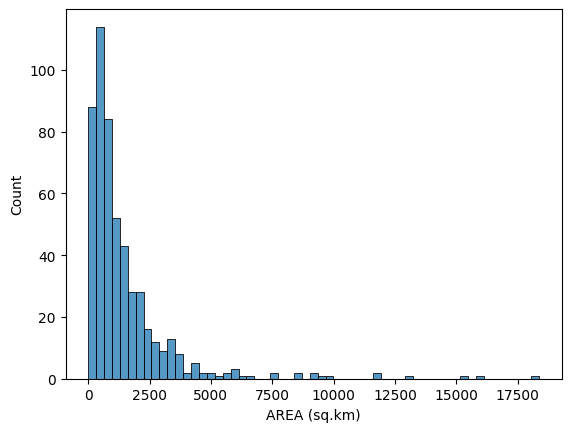

In [77]:
sns.histplot(df,x=df['AREA (sq.km)'])

<Axes: ylabel='AREA (sq.km)'>

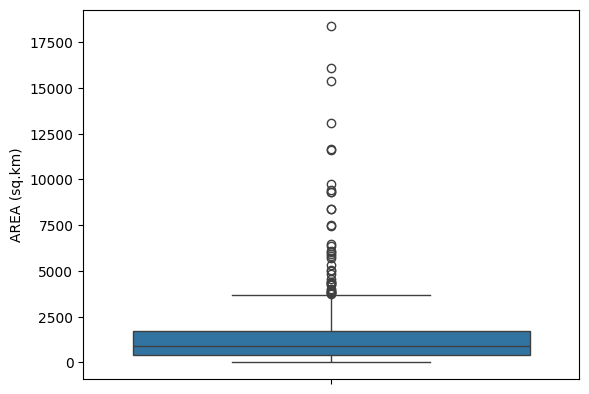

In [78]:
sns.boxplot(df,y=df['AREA (sq.km)'])

In [79]:
print(df['AREA (sq.km)'].min())
print(df['AREA (sq.km)'].max())

0.0
18374.0


In [80]:
df.columns

Index(['PROVINCE', 'DIVISION', 'DISTRICT', 'SUB DIVISION', 'AREA (sq.km)',
       'ALL SEXES (RURAL)', 'MALE (RURAL)', 'FEMALE (RURAL)',
       'TRANSGENDER (RURAL)', 'SEX RATIO (RURAL)',
       'AVG HOUSEHOLD SIZE (RURAL)', 'POPULATION 1998 (RURAL)',
       'ANNUAL GROWTH RATE (RURAL)', 'ALL SEXES (URBAN)', 'MALE (URBAN)',
       'FEMALE (URBAN)', 'TRANSGENDER (URBAN)', 'SEX RATIO (URBAN)',
       'AVG HOUSEHOLD SIZE (URBAN)', 'POPULATION 1998 (URBAN)',
       'ANNUAL GROWTH RATE (URBAN)'],
      dtype='object')

<Axes: xlabel='PROVINCE', ylabel='ALL SEXES (RURAL)'>

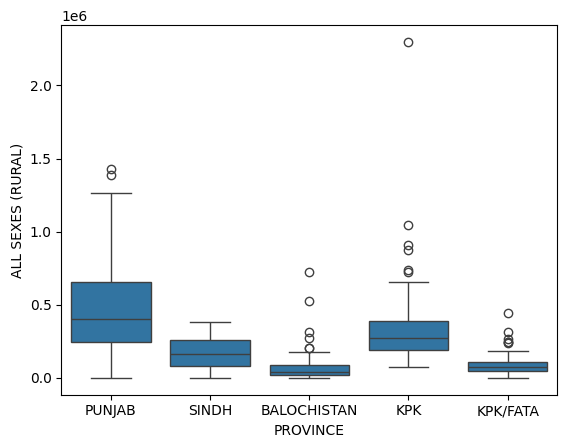

In [81]:
sns.boxplot(df,x='PROVINCE',y='ALL SEXES (RURAL)')

<Axes: xlabel='DIVISION', ylabel='ALL SEXES (RURAL)'>

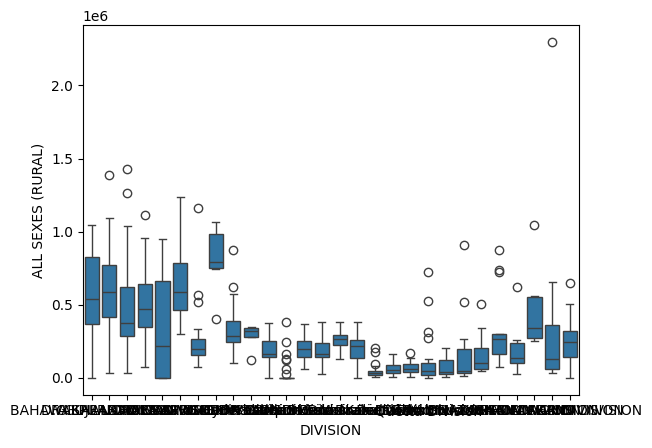

In [82]:
sns.boxplot(df,x='DIVISION',y='ALL SEXES (RURAL)')

In [83]:
#its hard to plot the data so we use grupby function to make it easier to plot

df.groupby(['DIVISION']).size().sort_values()

DIVISION
Badin Division                   5
MARDAN DIVISION                  7
SAHIWAL DIVISION                 7
KOHAT DIVISION                  14
MULTAN DIVISION                 14
D.G.KHAN DIVISION               14
HAZARA DIVISION                 15
BAHAWALPUR DIVISION             15
DERA ISMAIL KHAN DIVISION       15
BANNU DIVISION                  15
Shaheed Benazirabad Division    15
SARGODHA DIVISION               17
FAISALABAD DIVISION             17
LAHORE DIVISION                 17
Kalat Division                  18
Sukkur Division                 18
PESHAWAR DIVISION               18
Mirpurkhas Division             18
Naseerabad Division             19
Zhob Division                   19
GUJRANWALA DIVISION             20
Larkana Division                21
RAWALPINDI DIVISION             22
Karachi Division                30
Hyderabad Division              30
MALAKAND DIVISION               33
Makran Division                 37
Quetta Division                 38
dtype: int6

In [84]:
df.groupby('DIVISION')['ALL SEXES (RURAL)'].mean()

DIVISION
BAHAWALPUR DIVISION             575317.533333
BANNU DIVISION                  167286.866667
Badin Division                  282922.800000
D.G.KHAN DIVISION               614505.142857
DERA ISMAIL KHAN DIVISION       156810.200000
FAISALABAD DIVISION             526807.764706
GUJRANWALA DIVISION             510698.200000
HAZARA DIVISION                 316744.800000
Hyderabad Division              176117.800000
KOHAT DIVISION                  179610.571429
Kalat Division                   60748.777778
Karachi Division                 38016.400000
LAHORE DIVISION                 348967.882353
Larkana Division                201900.333333
MALAKAND DIVISION               253212.515152
MARDAN DIVISION                 468955.714286
MULTAN DIVISION                 632220.785714
Makran Division                  42605.432432
Mirpurkhas Division             189710.722222
Naseerabad Division              70283.578947
PESHAWAR DIVISION               317484.111111
Quetta Division          

In [85]:
df.groupby('DISTRICT')['ALL SEXES (RURAL)'].mean()

DISTRICT
ABBOTTABAD DISTRICT             3.789632e+05
ATTOCK DISTRICT                 2.325783e+05
AWARAN DISTRICT                 2.189600e+04
BADIN DISTRICT                  2.829228e+05
BAHAWALNAGAR DISTRICT           4.711940e+05
BAHAWALPUR DISTRICT             4.161690e+05
BAJAUR DISTRICT                 1.558553e+05
BANNU DISTRICT                  5.585615e+05
BARKHAN DISTRICT                1.588240e+05
BHAKKAR DISTRICT                3.470495e+05
BUNER DISTRICT                  2.238650e+05
CHAGAI DISTRICT                 5.256300e+04
CHAKWAL DISTRICT                2.423710e+05
CHARSADDA DISTRICT              4.469187e+05
CHINIOT DISTRICT                3.154763e+05
CHITRAL DISTRICT                1.989225e+05
DADU DISTRICT                   2.917460e+05
DERA BUGTI DISTRICT             2.659312e+04
DERA GHAZI KHAN DISTRICT        5.816025e+05
DERA ISMAIL KHAN DISTRICT       2.529740e+05
FAISALABAD DISTRICT             6.859297e+05
FR BANNU DISTRICT               4.311200e+04
F

In [86]:
df.groupby(['PROVINCE','DISTRICT','DIVISION','SUB DIVISION'])['ALL SEXES (RURAL)'].mean()

PROVINCE     DISTRICT                      DIVISION                      SUB DIVISION               
BALOCHISTAN  AWARAN DISTRICT               Makran Division               AWARAN TEHSIL                     8584.0
                                                                         GISHKORE SUB-TEHSIL              18390.0
                                                                         JHAL JAO SUB-TEHSIL              40010.0
                                                                         MASHKAI TEHSIL                   20600.0
             BARKHAN DISTRICT              Zhob Division                 BARKHAN TEHSIL                  158824.0
             CHAGAI DISTRICT               Quetta Division               CHAGAI SUB-TEHSIL                58256.0
                                                                         DALBANDIN TEHSIL                111203.0
                                                                         NOKUNDI SUB-TEHSIL          

In [87]:
df.groupby(['PROVINCE','DISTRICT','DIVISION','SUB DIVISION'])['POPULATION 1998 (RURAL)'].mean()


PROVINCE     DISTRICT                      DIVISION                      SUB DIVISION               
BALOCHISTAN  AWARAN DISTRICT               Makran Division               AWARAN TEHSIL                    27156.0
                                                                         GISHKORE SUB-TEHSIL              22430.0
                                                                         JHAL JAO SUB-TEHSIL              34214.0
                                                                         MASHKAI TEHSIL                   34373.0
             BARKHAN DISTRICT              Zhob Division                 BARKHAN TEHSIL                   95875.0
             CHAGAI DISTRICT               Quetta Division               CHAGAI SUB-TEHSIL                22511.0
                                                                         DALBANDIN TEHSIL                 48380.0
                                                                         NOKUNDI SUB-TEHSIL          

In [88]:
df['ALL SEXES (RURAL)'].sum()

130034790

In [89]:
print("Total Population of Pakistan in 2017 was : ",df['ALL SEXES (RURAL)'].sum())

Total Population of Pakistan in 2017 was :  130034790


In [90]:
df['POPULATION 1998 (RURAL)'].sum()

88401981

In [91]:
print("Total Population of Pakistan in 2017 was : ",df['POPULATION 1998 (RURAL)'].sum())

Total Population of Pakistan in 2017 was :  88401981


In [92]:
# How much Rural population increased from 1998 to 2017

pop_1998 = df['POPULATION 1998 (RURAL)'].sum()
pop_2017 = df['ALL SEXES (RURAL)'].sum()

pop_change = pop_2017 - pop_1998
print('The Rural Population of Pakistan Increased from 1998 to 2017 : ',pop_change)

The Rural Population of Pakistan Increased from 1998 to 2017 :  41632809


In [93]:
#Population increase in percentage

pop_change = (pop_2017 - pop_1998) / pop_1998 * 100

print('The Rural Population of Pakistan Increased from 1998 to 2017 by : ',pop_change,'%')

The Rural Population of Pakistan Increased from 1998 to 2017 by :  47.094882409931515 %


In [94]:
# How much Rural population increased from 1998 to 2017

popu_1998 = df['POPULATION 1998 (URBAN)'].sum()
popu_2017 = df['ALL SEXES (URBAN)'].sum()

popu_change = popu_2017 - popu_1998
print('The Urban Population of Pakistan Increased from 1998 to 2017 : ',pop_change)

The Urban Population of Pakistan Increased from 1998 to 2017 :  47.094882409931515


In [95]:
#Population increase in percentage

popu_change = (popu_2017 - popu_1998) / popu_1998 * 100

print('The Rural Population of Pakistan Increased from 1998 to 2017 by : ',popu_change,'%')

The Rural Population of Pakistan Increased from 1998 to 2017 by :  75.76179513294761 %
